In [2]:
# 라이브러리
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

In [3]:
# 시각화를 위한 한글 폰트 설정
from matplotlib import font_manager,rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [4]:
# 시각화 선명하게 설정
# retina 디스플레이가 지원되는 환경에서 시각화의 폰트가 더 선명하게 보임
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [5]:
# 파일불러오기 ( NS 홈쇼핑 - 실적 데이터 )
ns = pd.read_csv("dummy2.csv")
ns

,Unnamed: 0,datetime,exposure,mother_code,code,name,category,price,revenue,year,month,date,time,count,sex,installment,dayofweek
0,0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900.0,2099000.0,2019,1,1,06:00:00,52.606516,남성,무관,1
1,1,2019-01-01 06:00:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900.0,4371000.0,2019,1,1,06:00:00,109.548872,여성,무관,1
2,2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900.0,3262000.0,2019,1,1,06:20:00,81.754386,남성,무관,1
3,3,2019-01-01 06:20:00,NaN,100346,201079,테이트 여성 셀린니트3종,의류,39900.0,6955000.0,2019,1,1,06:20:00,174.310777,여성,무관,1
4,4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900.0,6672000.0,2019,1,1,06:40:00,167.218045,남성,무관,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38304,38304,2020-01-01 00:20:00,20.0,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,NaN,NaN,2020,1,1,00:20:00,NaN,무관,무관,2
38305,38305,2020-01-01 00:40:00,20.0,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,NaN,NaN,2020,1,1,00:40:00,NaN,무관,무관,2
38306,38306,2020-01-01 01:00:00,20.0,100073,200196,삼성화재 행복한파트너 주택화재보험(1912),무형,NaN,NaN,2020,1,1,01:00:00,NaN,무관,무관,2
38307,38307,2020-01-01 01:20:00,20.0,100490,201478,더케이 예다함 상조서비스(티포트),무형,NaN,NaN,2020,1,1,01:20:00,NaN,무관,무관,2


In [6]:
# 파일불러오기 ( 날씨 데이터 (평균,최저,최고, 강수량 전국 평균) )
weather = pd.read_csv("weather.csv",encoding='cp949')
weather

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),강수량(mm)
0,2019-01-01,전국,-2.1,-5.8,2.1,0.1
1,2019-01-02,전국,-2.5,-7.0,3.2,0.0
2,2019-01-03,전국,-2.1,-7.7,5.0,0.0
3,2019-01-04,전국,-0.7,-7.3,5.3,0.0
4,2019-01-05,전국,0.2,-4.6,5.3,0.0
...,...,...,...,...,...,...
361,2019-12-28,전국,0.5,-4.9,7.5,0.0
362,2019-12-29,전국,2.6,-2.4,6.6,6.2
363,2019-12-30,전국,5.0,0.1,9.8,0.9
364,2019-12-31,전국,-3.8,-6.7,0.4,0.1


In [7]:
weather.shape # (366, 6)

(366, 6)

In [8]:
weather.dtypes

날짜          object
지점          object
평균기온(℃)    float64
최저기온(℃)    float64
최고기온(℃)    float64
강수량(mm)    float64
dtype: object

In [9]:
# 날짜 데이터 타입으로 변경
weather['날짜'] = pd.to_datetime(weather['날짜'])
weather.dtypes

날짜         datetime64[ns]
지점                 object
평균기온(℃)           float64
최저기온(℃)           float64
최고기온(℃)           float64
강수량(mm)           float64
dtype: object

In [10]:
weather['year'] = weather['날짜'].dt.year
weather['month'] = weather['날짜'].dt.month
weather['dayofweek'] = weather['날짜'].dt.isocalendar().week
weather['date'] = weather['날짜'].dt.day

In [11]:
weather.dtypes

날짜           datetime64[ns]
지점                   object
평균기온(℃)             float64
최저기온(℃)             float64
최고기온(℃)             float64
강수량(mm)             float64
year                  int64
month                 int64
dayofweek            UInt32
date                  int64
dtype: object

In [12]:
weather.head(15)

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),강수량(mm),year,month,dayofweek,date
0,2019-01-01,전국,-2.1,-5.8,2.1,0.1,2019,1,1,1
1,2019-01-02,전국,-2.5,-7.0,3.2,0.0,2019,1,1,2
2,2019-01-03,전국,-2.1,-7.7,5.0,0.0,2019,1,1,3
3,2019-01-04,전국,-0.7,-7.3,5.3,0.0,2019,1,1,4
4,2019-01-05,전국,0.2,-4.6,5.3,0.0,2019,1,1,5
5,2019-01-06,전국,-1.3,-6.1,5.7,0.0,2019,1,1,6
6,2019-01-07,전국,-0.5,-6.3,5.5,0.0,2019,1,2,7
7,2019-01-08,전국,-0.7,-4.8,4.2,0.0,2019,1,2,8
8,2019-01-09,전국,-2.9,-8.0,2.9,0.0,2019,1,2,9
9,2019-01-10,전국,0.5,-3.4,5.1,0.0,2019,1,2,10


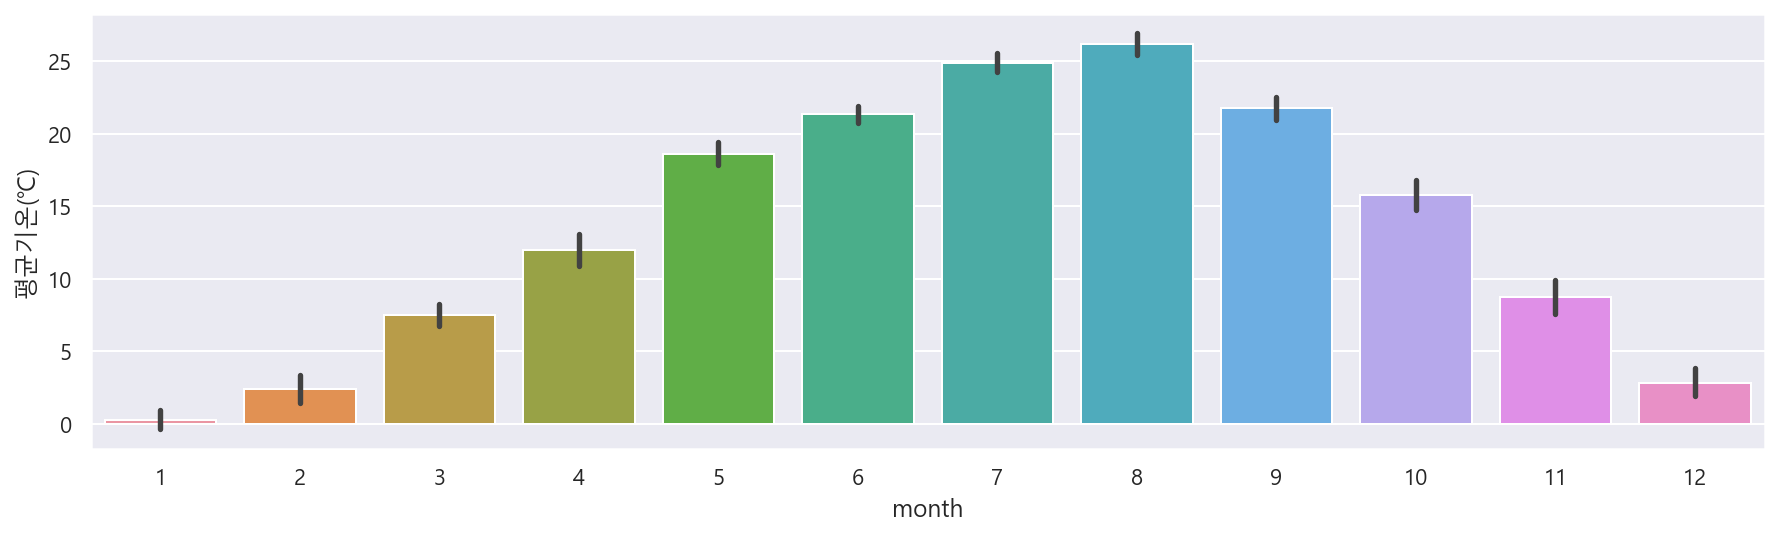

In [23]:
plt.figure(figsize=(15,4))
sns.barplot(data=weather , y='평균기온(℃)' ,x = 'month' )

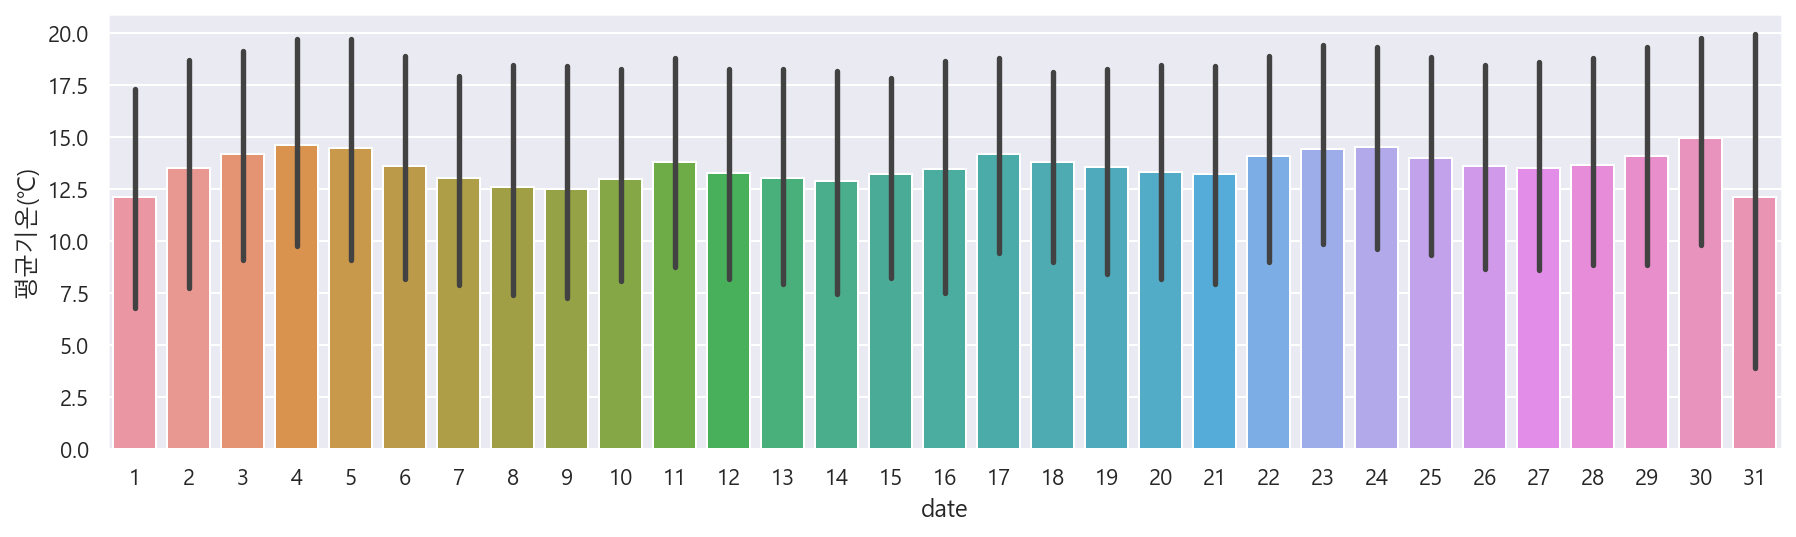

In [24]:
plt.figure(figsize=(15,4))
sns.barplot(data=weather , y='평균기온(℃)' ,x = 'date' )

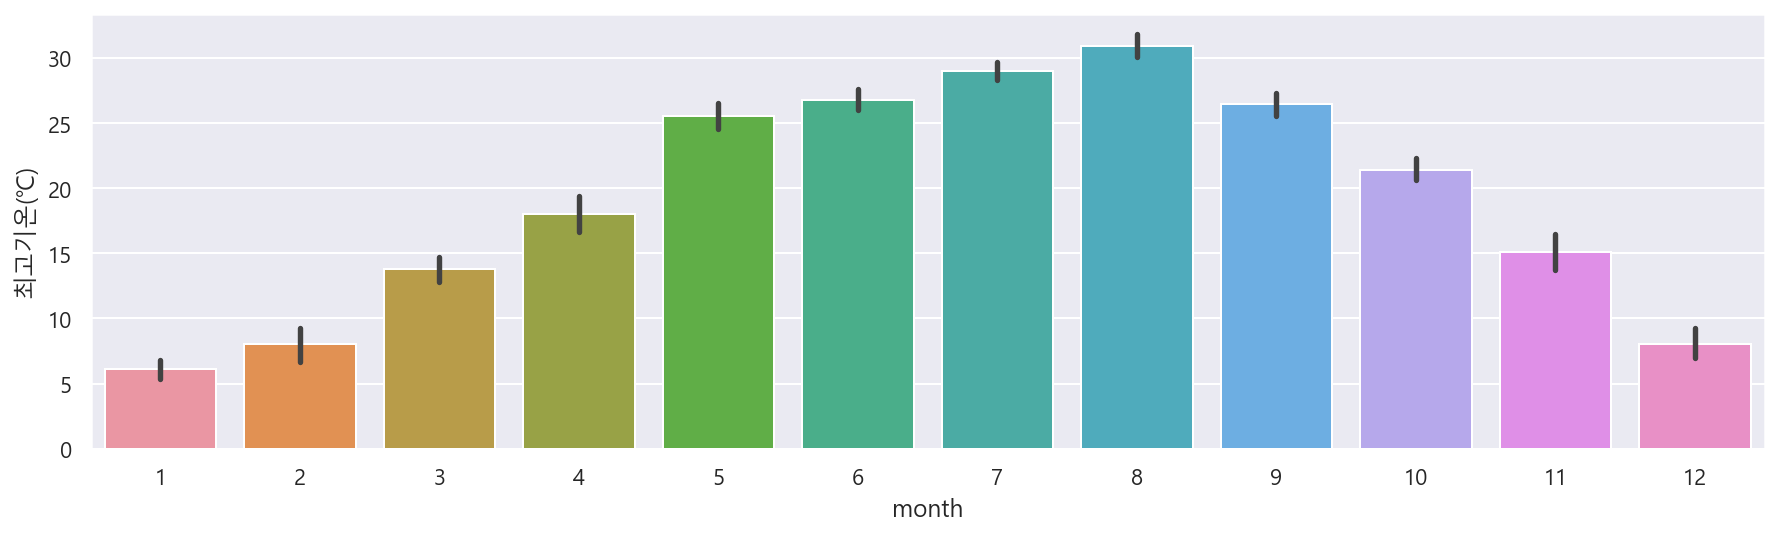

In [25]:
plt.figure(figsize=(15,4))
sns.barplot(data=weather , y='최고기온(℃)' ,x = 'month' )

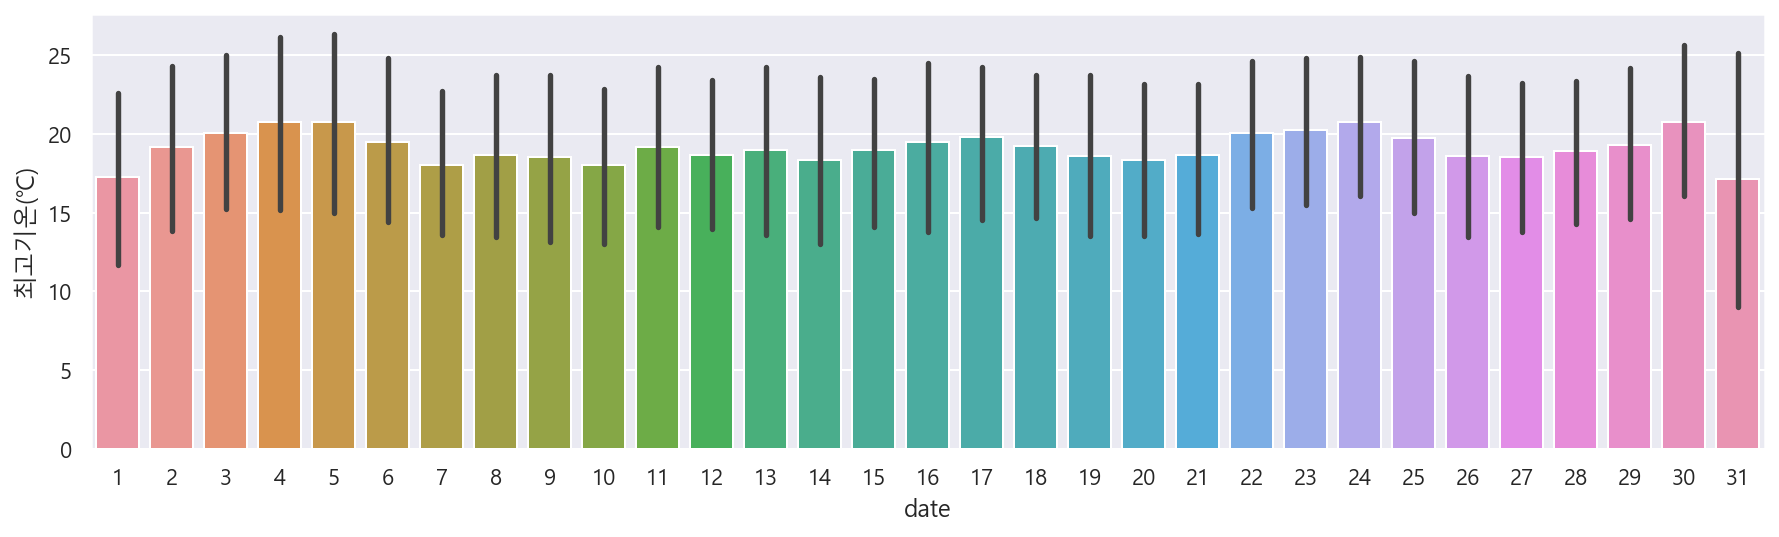

In [26]:
plt.figure(figsize=(15,4))
sns.barplot(data=weather , y='최고기온(℃)' ,x = 'date' )

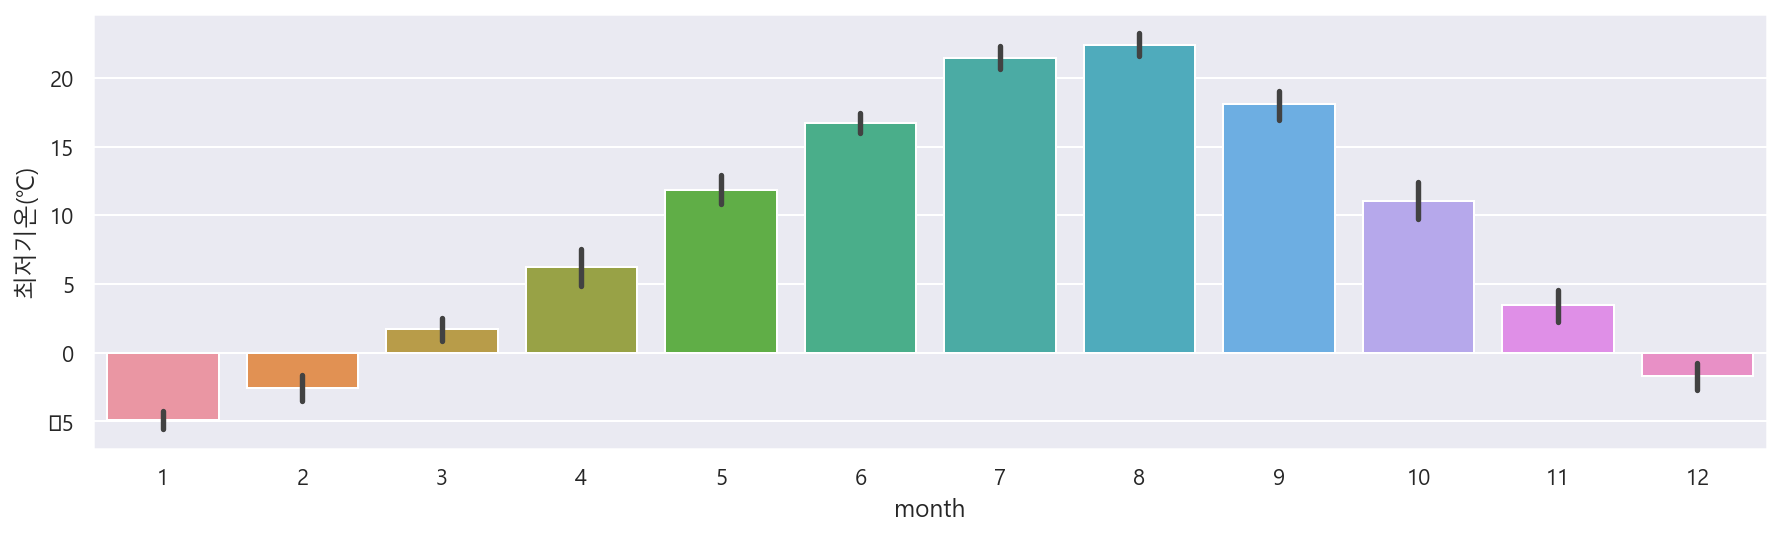

In [27]:
plt.figure(figsize=(15,4))
sns.barplot(data=weather , y='최저기온(℃)' ,x = 'month' )

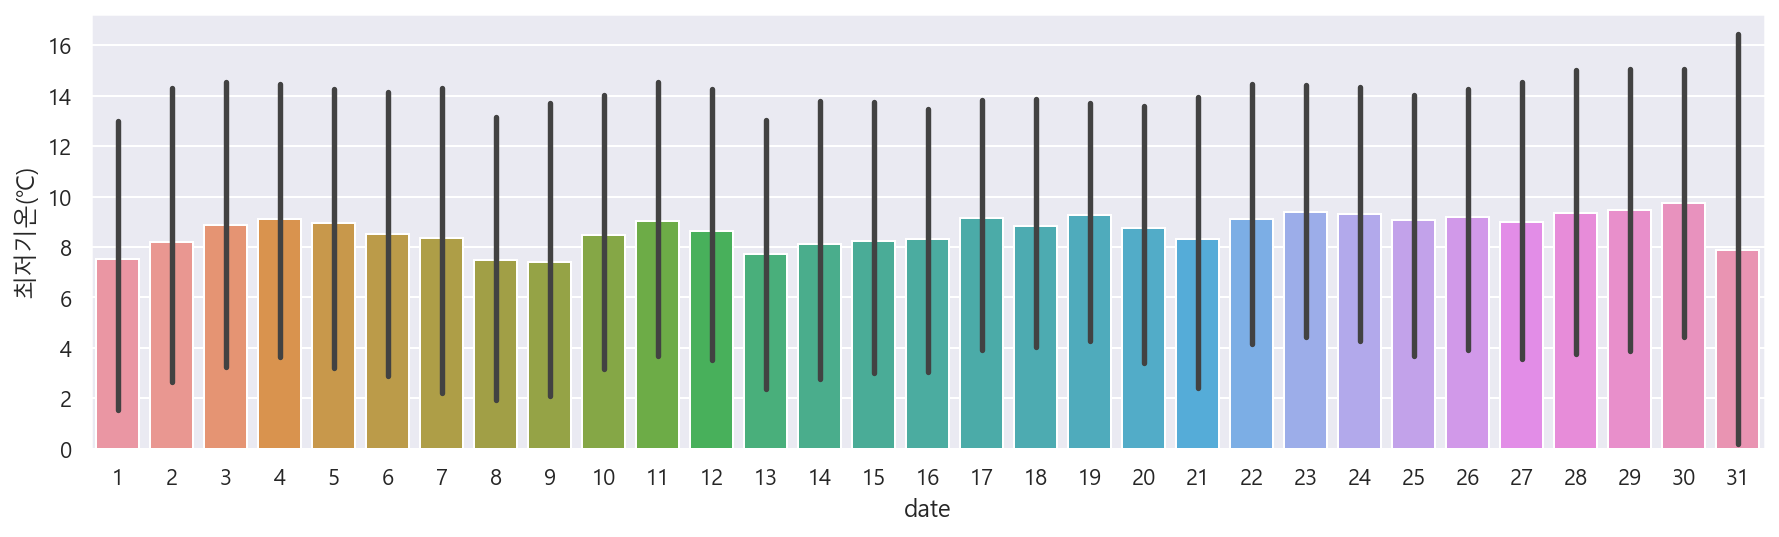

In [28]:
plt.figure(figsize=(15,4))
sns.barplot(data=weather , y='최저기온(℃)' ,x = 'date' )

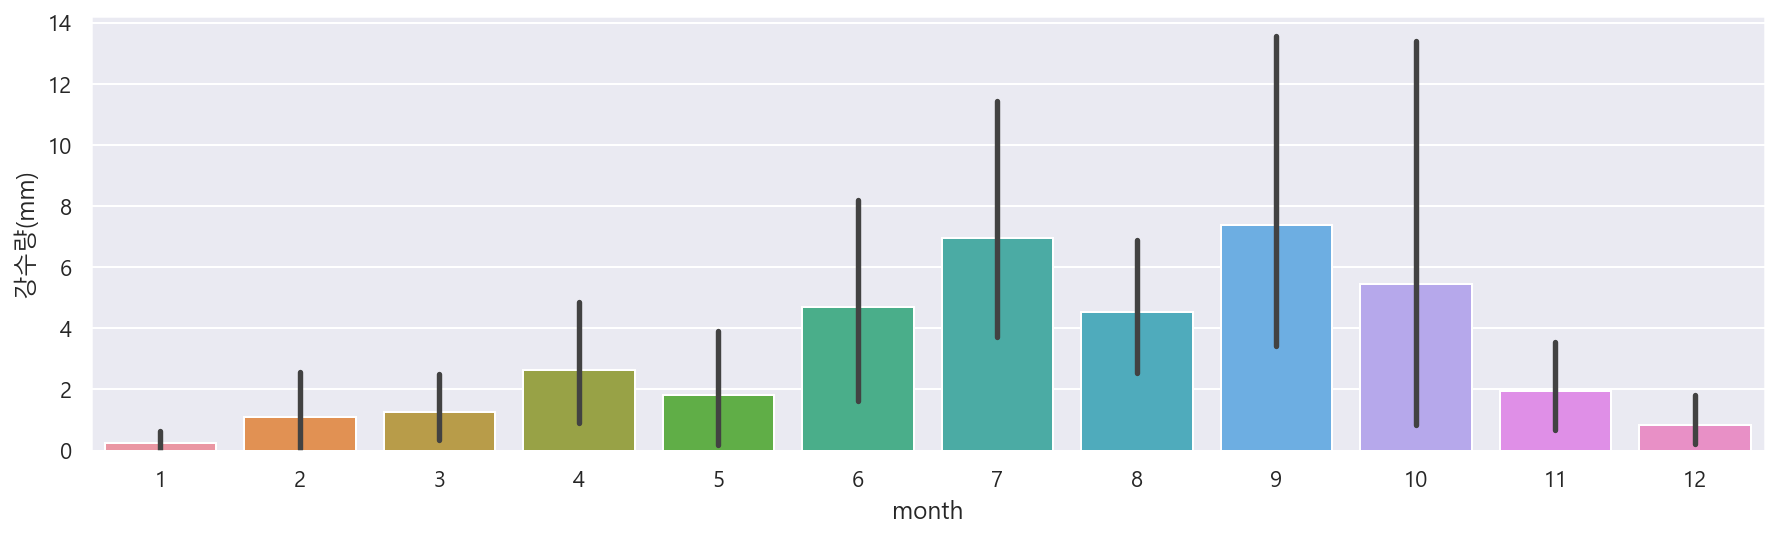

In [29]:
plt.figure(figsize=(15,4))
sns.barplot(data=weather , y='강수량(mm)' ,x = 'month' )

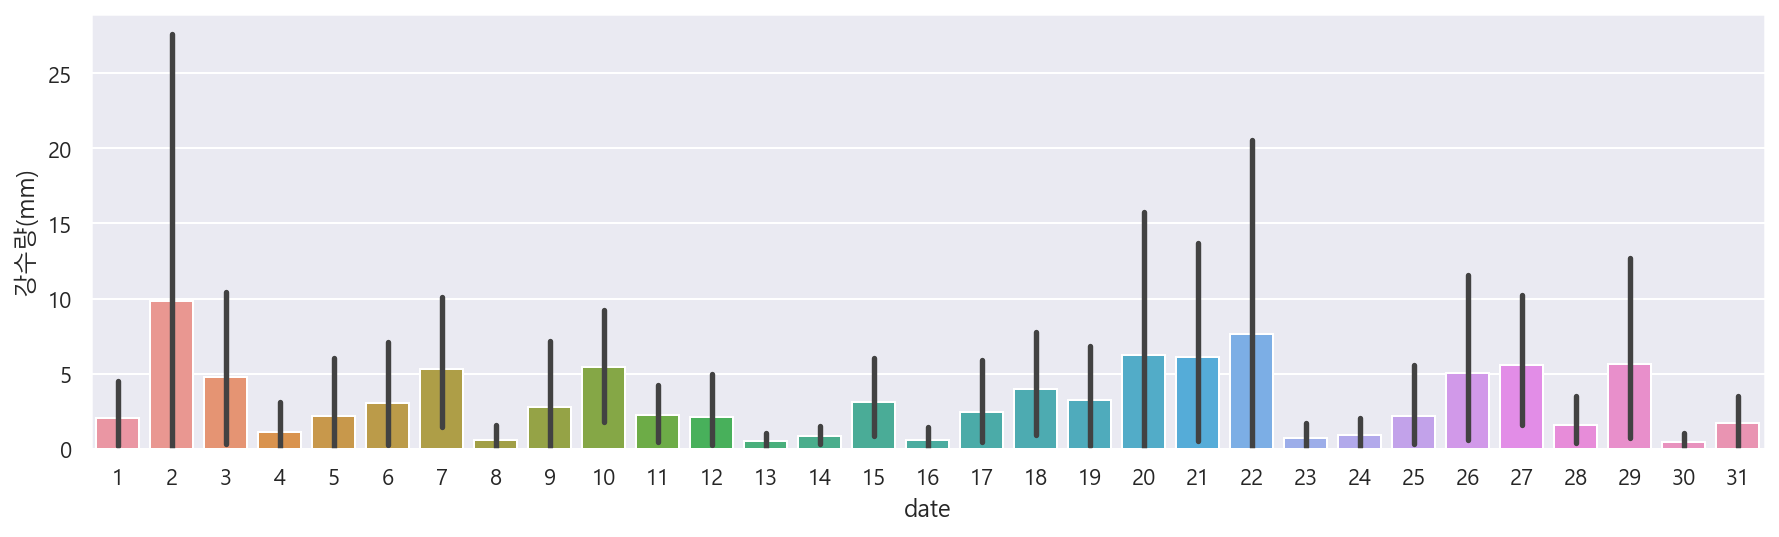

In [30]:
plt.figure(figsize=(15,4))
sns.barplot(data=weather , y='강수량(mm)' ,x = 'date' )

In [32]:
ns = pd.concat([ns,weather])
ns

,Unnamed: 0,datetime,exposure,mother_code,code,name,category,price,revenue,year,...,count,sex,installment,dayofweek,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃),강수량(mm)
0,0.0,2019-01-01 06:00:00,20.0,100346.0,201072.0,테이트 남성 셀린니트3종,의류,39900.0,2099000.0,2019,...,52.606516,남성,무관,1,NaT,NaN,NaN,NaN,NaN,NaN
1,1.0,2019-01-01 06:00:00,NaN,100346.0,201079.0,테이트 여성 셀린니트3종,의류,39900.0,4371000.0,2019,...,109.548872,여성,무관,1,NaT,NaN,NaN,NaN,NaN,NaN
2,2.0,2019-01-01 06:20:00,20.0,100346.0,201072.0,테이트 남성 셀린니트3종,의류,39900.0,3262000.0,2019,...,81.754386,남성,무관,1,NaT,NaN,NaN,NaN,NaN,NaN
3,3.0,2019-01-01 06:20:00,NaN,100346.0,201079.0,테이트 여성 셀린니트3종,의류,39900.0,6955000.0,2019,...,174.310777,여성,무관,1,NaT,NaN,NaN,NaN,NaN,NaN
4,4.0,2019-01-01 06:40:00,20.0,100346.0,201072.0,테이트 남성 셀린니트3종,의류,39900.0,6672000.0,2019,...,167.218045,남성,무관,1,NaT,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,...,NaN,NaN,NaN,52,2019-12-28,전국,0.5,-4.9,7.5,0.0
362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,...,NaN,NaN,NaN,52,2019-12-29,전국,2.6,-2.4,6.6,6.2
363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,...,NaN,NaN,NaN,1,2019-12-30,전국,5.0,0.1,9.8,0.9
364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,...,NaN,NaN,NaN,1,2019-12-31,전국,-3.8,-6.7,0.4,0.1
